# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)


Using device: cuda


In [4]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 138 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 34.4 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 45.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [6]:
# Define transforms
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)), ])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST('./MNIST', download = True, train = True, transform = trans)
training_loader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST('./MNIST', download = True, train = False, transform = trans)
test_loader = torch.utils.data.DataLoader(testset, batch_size = 32, shuffle = True)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

If not normalized, PyTorch cannot process the data.
If not flattened, I get the error "mat1 and mat2 shapes cannot be multiplied (1792x28 and 784x128)". But the images are flattened later, in order not to interfere with the preview.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


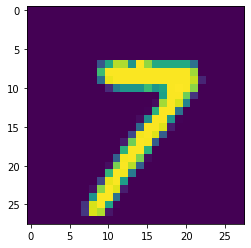

5


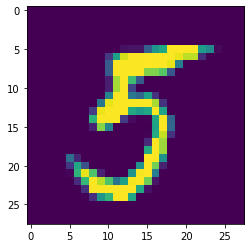

1


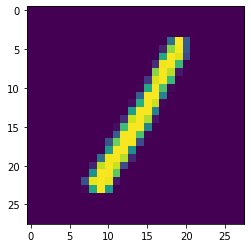

1


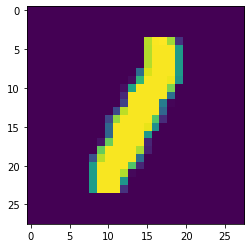

5


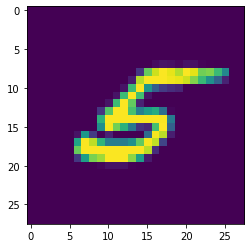

In [8]:
# Explore data
show5(training_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        # I should try relu and sigmoid here
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
model = MyNetwork()
model

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
def Trainee(model):
    loss_keeper = {'train':[]}
    epochs = 25

    for epoch in range(epochs):
        train_loss = 0.0

        model.train()
        
        for image, label in training_loader:
            
            #flattening
            image = image.view(image.shape[0], -1)
            
            optimizer.zero_grad()
            output = model(image)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss = train_loss / len(training_loader)
        loss_keeper['train'].append(train_loss)

        print(f"\nEpoch : {epoch + 1}\tTraining Loss : {train_loss}")
        
    return(loss_keeper)

model_loss=Trainee(model)


Epoch : 1	Training Loss : 1.6609900582319639

Epoch : 2	Training Loss : 1.549160062758399

Epoch : 3	Training Loss : 1.5319585823046882

Epoch : 4	Training Loss : 1.5197236919199735

Epoch : 5	Training Loss : 1.5123528751737274

Epoch : 6	Training Loss : 1.5075083713033306

Epoch : 7	Training Loss : 1.504262853024611

Epoch : 8	Training Loss : 1.5017072540610583

Epoch : 9	Training Loss : 1.4987483924385836

Epoch : 10	Training Loss : 1.498273486902973

Epoch : 11	Training Loss : 1.4961102358313765

Epoch : 12	Training Loss : 1.4937406980406756

Epoch : 13	Training Loss : 1.4942027292271922

Epoch : 14	Training Loss : 1.4930052905957074

Epoch : 15	Training Loss : 1.4921676653788796

Epoch : 16	Training Loss : 1.491455703656048

Epoch : 17	Training Loss : 1.489456993430408

Epoch : 18	Training Loss : 1.4888067324278451

Epoch : 19	Training Loss : 1.4877180338922593

Epoch : 20	Training Loss : 1.4876987111848046

Epoch : 21	Training Loss : 1.4877536172297463

Epoch : 22	Training Loss :

Plot the training loss (and validation loss/accuracy, if recorded).

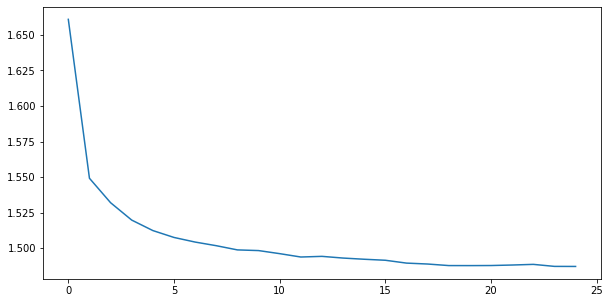

In [12]:
plt.figure(figsize = (10,5))
plt.plot(model_loss['train'],label = "Training Loss")
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [28]:
model.eval()
correct = 0
total = 0

for image, label in test_loader:
    image = image.view(image.shape[0], -1)
    
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    
    correct += torch.sum(preds == label.data)
    total += len(label)
    
test_accuracy = correct / total
print(f"Accuracy:{test_accuracy:.5f}")

Accuracy:0.96600


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

I did not need as many epochs as I previously set: it kind of flattens out after 20 epochs,
    so training the model more just results in overfitting.
    Lower learning rate proved out to be effective.


## Saving your model
Using `torch.save`, save your model for future loading.

In [31]:
torch.save(model.state_dict(), "./digitsClassifier")